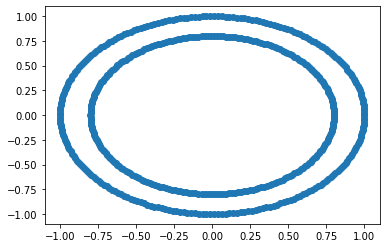

In [11]:
#spectral kmeans
import numpy as np
#import random
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
#导入数据
#data,y=make_moons(n_samples=100)
data, y = make_circles(n_samples=500)
plt.figure()
plt.plot(data[:,0],data[:,1],'o')
plt.show()

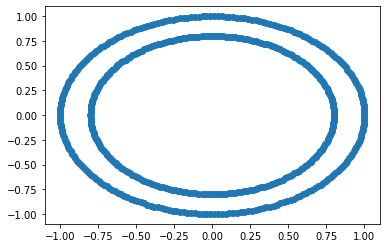

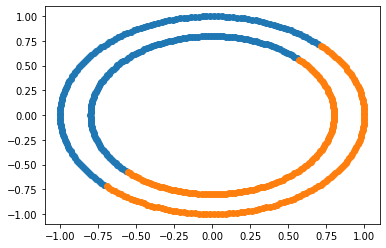

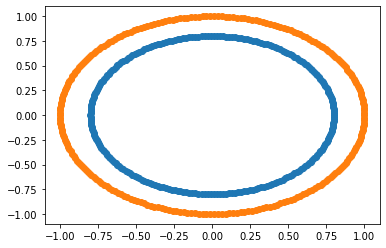

In [10]:
def kmeans_me(X_original,X,K):  #上面自己写的k均值聚类 X_original是原始数据，X是变换后的数据
    n=len(X[0])     #数据集维数
    N=len(X)   #数据集个数
    #随机选取初始中心点
    K_index=np.random.randint(0,N,K)   #选取中心点的下标
    C=X[K_index]

    iter_max=10
    label=-np.ones(N)
    for i in range(iter_max):
        for j in range(N):     #每个数据点找到最近的中心点的下标
            distance_vec=X[j]-C
            distance_vec=distance_vec.T
            distance_temp=sum(distance_vec**2)
            distance_index=distance_temp.argsort()
            label[j]=distance_index[0] 

        for k in range(K):     #更新每类的中心点
            C_temp=X[label==k]
            C[k]=C_temp.mean(axis=0)
    plt.figure()          #把中心点和各类点画出来
    for k in range(K):
        plt.plot(X_original[label==k,0],X_original[label==k,1],'o')
    plt.show()
    
def distance(x,y):  #定义两点之间的距离，这里用欧式距离，即两点之间的直线长度
    return np.linalg.norm(x-y)

def GetW(X,sigma): #获得相似度矩阵
    N=len(X)  #获得样本个数
    dist_mat=np.zeros((N,N))
    W=np.zeros(dist_mat.shape)
    for i in range(N):
        for j in range(i,N):   #距离矩阵dist_mat和权重矩阵都是对称的
            dist_mat[i,j]=dist_mat[j,i]=distance(data[i],data[j])
    W=np.exp(-dist_mat**2/sigma)
    return W
    
def GetEigVec(L,cluster_num):   #从拉普拉斯矩阵中获得特征矩阵
    eigval,eigvec=np.linalg.eig(L)  #获得特征根和特征向量
    sort_index=eigval.argsort()
    return eigvec[:,sort_index[0:cluster_num]]



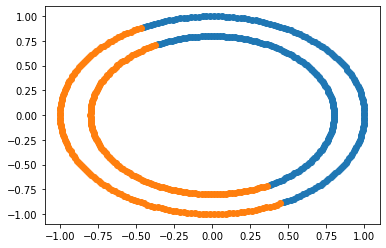

In [12]:
K=2   #分成K类
kmeans_me(data,data,K)

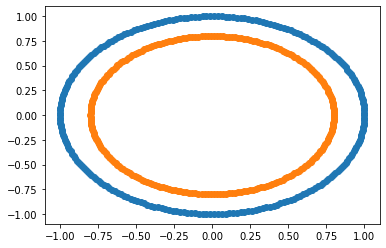

In [13]:
sigma=0.001
W=GetW(data,sigma)
D_vec=sum(W)
L=np.diag(D_vec)-W
data_new=GetEigVec(L,K)
kmeans_me(data,data_new,K)